# Differentiate weeds from crop seedlings using a convolutional neural network (CNN)

The goal of the project is to correctly identify the weed type from a variety of weed and crop RGB images using a relatively big dataset (~2GB).

Created on Sun Jan 12 12:33:49 2020

@author: neal gilmore

## What is the objective of the machine learning model?

We aim to maximise the accuracy, i.e., the correct classification of the different weed varieties.

## Table of Contents<a id='0.0'></a>

#### [STEP 1: Environment Preparation](#1.0)
1.1 [Import required libraries](#1.1)  
1.2 [Prepare for reproducability](#1.2)  

#### [STEP 2: Data Preparation](#2.0)
2.1 [Import data](#2.1)  
2.2 [Prepare dataframe of image directories and classifications](#2.2)  
2.3 [Summary statistics](#2.3) 

#### [STEP 3: Data Analysis](#3.0)
3.1 [Visualize a few images](#3.1)  

#### [STEP 4: Feature Engineering](#4.0)
4.1  

#### [STEP 5: Feature Selection](#5.0)
5.1 

#### [STEP 6: Model Building](#6.0)
6.1   

## STEP 1: Environment Preparation<a id='1.0'></a> [(Top)](#0.0)

### 1.1 Import required libraries<a id='1.1'></a> [(Top)](#0.0)

In [1]:
# System libraries
import os
import sys
import time
import warnings
from glob import glob

# Basic Python libraries
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.style
import matplotlib.pyplot as plt
import seaborn as sns; #sns.set(style="white", color_codes=True)
import missingno as msno # Provides a library of data missingness functions 

# Images library
import cv2

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing import image
from keras.utils import np_utils

# ### Turn off Depreciation and Future warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

if not sys.warnoptions:
    warnings.simplefilter('ignore')

#%matplotlib inline

pd.set_option('precision', 3) # set the precision of numerical representation
pd.set_option('expand_frame_repr', True)
pd.set_option('display.max_columns', None) # to display all the columns of the dataframe in the notebook

# Set the plotting style
plt.style.use('default')

print('>> Required libraries imported')

Using TensorFlow backend.


>> Required libraries imported


### 1.2 Prepare for reproducability<a id="1.2"></a>[(Top)](#0.0)

In [2]:
# Set random seed to maintain reproducability
random_state = np.random.seed(42)

## STEP 2: Data Preparation<a id='2.0'></a> [(Top)](#0.0)

### 2.1 Import data<a id='2.1'></a> [(Top)](#0.0)

In [5]:
# Import the dataset

# here are all our images
DATA_FOLDER = '../data/raw/v2-plant-seedlings-dataset'

# each weed class is in a dedicated folder
os.listdir(DATA_FOLDER)

['Cleavers',
 'Sugar beet',
 'Common Chickweed',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Fat Hen',
 'Common wheat',
 'Black-grass',
 'nonsegmentedv2',
 'Small-flowered Cranesbill',
 'Charlock',
 'Maize']

### 2.2 Prepare dataframe of image directories and classifications<a id='2.2'></a> [(Top)](#0.0)

In [6]:
# Walk over the directory structure to understand how 
# the images are stored

for class_folder_name in os.listdir(DATA_FOLDER):
    class_folder_path = os.path.join(DATA_FOLDER, class_folder_name)
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        print(image_path)

../data/raw/v2-plant-seedlings-dataset/Cleavers/348.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/176.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/88.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/162.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/189.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/77.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/63.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/228.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/200.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/214.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/215.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/201.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/229.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/62.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/188.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/76.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/163.png
../data/raw/v2-plant-seedlings-dataset/Cleavers/177.p

../data/raw/v2-plant-seedlings-dataset/Common Chickweed/600.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/614.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/172.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/358.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/402.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/364.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/370.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/416.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/459.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/317.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/471.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/465.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/303.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/129.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/115.png
../data/raw/v2-plant-seedlings-dataset/C

../data/raw/v2-plant-seedlings-dataset/Common Chickweed/86.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/178.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/150.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/636.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/622.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/144.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/391.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/385.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/408.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/434.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/352.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/346.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/420.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/350.png
../data/raw/v2-plant-seedlings-dataset/Common Chickweed/436.png
../data/raw/v2-plant-seedlings-dataset/Co

../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/348.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/412.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/374.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/360.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/406.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/176.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/88.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/604.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/162.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/189.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/77.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/63.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/228.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/566.png
../data/raw/v2-plant-seedlings-dataset/Scentless Mayweed/200.png
../data/raw/v2-plant-seedlin

../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/166.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/98.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/172.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/129.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/115.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/101.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/14.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/28.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/263.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/276.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/262.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/29.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/15.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/100.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/114.png
../data/raw/v2-plant-seedlings-dataset/Shepherds Purse/128.p

../data/raw/v2-plant-seedlings-dataset/Common wheat/125.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/119.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/18.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/30.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/24.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/247.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/253.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/252.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/246.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/25.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/19.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/118.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/124.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/130.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/95.png
../data/raw/v2-plant-seedlings-dataset/Common wheat/81.png
../data/raw/v2-plant-seedlings-dataset/Common w

../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/467.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/329.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/463.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/305.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/311.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/477.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/339.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/488.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/107.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/113.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/12.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/517.png
../data/raw/v2-plant-seedlings-dataset/Small-flowered Cranesbill/271.png
../data/raw/v2-plant-seedlings-dataset/Small-flowere

../data/raw/v2-plant-seedlings-dataset/Maize/176.png
../data/raw/v2-plant-seedlings-dataset/Maize/88.png
../data/raw/v2-plant-seedlings-dataset/Maize/162.png
../data/raw/v2-plant-seedlings-dataset/Maize/189.png
../data/raw/v2-plant-seedlings-dataset/Maize/77.png
../data/raw/v2-plant-seedlings-dataset/Maize/63.png
../data/raw/v2-plant-seedlings-dataset/Maize/228.png
../data/raw/v2-plant-seedlings-dataset/Maize/200.png
../data/raw/v2-plant-seedlings-dataset/Maize/214.png
../data/raw/v2-plant-seedlings-dataset/Maize/215.png
../data/raw/v2-plant-seedlings-dataset/Maize/201.png
../data/raw/v2-plant-seedlings-dataset/Maize/229.png
../data/raw/v2-plant-seedlings-dataset/Maize/62.png
../data/raw/v2-plant-seedlings-dataset/Maize/188.png
../data/raw/v2-plant-seedlings-dataset/Maize/76.png
../data/raw/v2-plant-seedlings-dataset/Maize/163.png
../data/raw/v2-plant-seedlings-dataset/Maize/177.png
../data/raw/v2-plant-seedlings-dataset/Maize/89.png
../data/raw/v2-plant-seedlings-dataset/Maize/149.png

In [7]:
# Create a dataframe that stores the paths to the images in one column
# and the class of the weed (the target) in the next column

images_df = []

# navigate within each folder
for class_folder_name in os.listdir(DATA_FOLDER):
    class_folder_path = os.path.join(DATA_FOLDER, class_folder_name)
    
    # collect every image path
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        
        tmp = pd.DataFrame([image_path, class_folder_name]).T
        images_df.append(tmp)

# concatenate the final df
images_df = pd.concat(images_df, axis=0, ignore_index=True)
images_df.columns = ['image', 'target']
images_df.head(10)

,image,target
0,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers
1,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers
2,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers
3,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers
4,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers
5,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers
6,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers
7,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers
8,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers
9,../data/raw/v2-plant-seedlings-dataset/Cleaver...,Cleavers


### 2.3 Summary statistics<a id='2.3'></a> [(Top)](#0.0)

In [8]:
# Identify how many images per class
images_df['target'].value_counts()

Loose Silky-bent             762
Common Chickweed             713
Scentless Mayweed            607
Small-flowered Cranesbill    576
Fat Hen                      538
Sugar beet                   463
Charlock                     452
Cleavers                     335
Black-grass                  309
Shepherds Purse              274
Maize                        257
Common wheat                 253
Name: target, dtype: int64

In [9]:
# Isolate a path for demo
# we want to load the image in this path later

images_df.loc[0, 'image']

'../data/raw/v2-plant-seedlings-dataset/Cleavers/348.png'

## STEP 3: Data Analysis<a id='3.0'></a> [(Top)](#0.0)

### 3.1 Visualize a few images<a id='3.1'></a> [(Top)](#0.0)

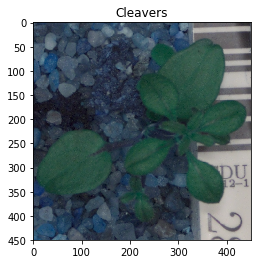

In [10]:
# Visualise a few images
def plot_single_image(df, image_number):
    im = cv2.imread(df.loc[image_number, 'image'])
    plt.title(df.loc[image_number, 'target'])
    plt.imshow(im)
    
plot_single_image(images_df, 0)

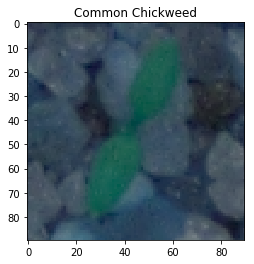

In [12]:
plot_single_image(images_df, 1000)

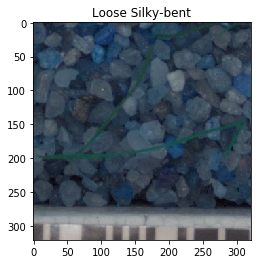

In [13]:
plot_single_image(images_df, 2000)

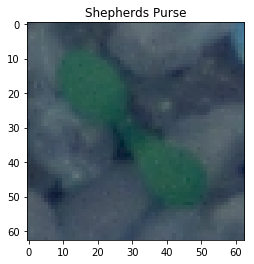

In [14]:
plot_single_image(images_df, 3000)